# 第1章 图像数据的表示与基本运算

## 1.1 图像文件的读写与显示

- 图像数据来源除了通过摄像机、采集卡、网络流媒体等实时采集外，大部分来自于图像文件或视频文件。在处理之前，须先把图像数据从文件读入到内存。
- 本节主要介绍如何使用OpenCV、Matplotlib、Scikit-image、Pillow等工具包提供的函数，来读取、显示和保存图像。

### 1.1.1 OpenCV读写与显示图像文件

- ### 目标

    - 在这里，你将学习如何读取读取、显示和保存图像
    - 你将熟悉以下函数cv.imread()，cv.imshow()，cv.imwrite()
    - 你将学习如何使用Matplotlib显示图像

- ### 调用格式：retval=cv.imread(filename[, flags])

    - 使用cv.imread()函数读取图像。
    - 第一个参数filename，指定读取图像文件名，该文件应在当前工作目录，或给出图像的完整路径（绝对路径或相对路径）。就算图像的路径是错的， OpenCV 也不会提醒你的，但是当你使用命 令print img时得到的结果是None
    - 第二个参数flags，是一个标志，它指定了读取图像的下列方式之一。
        - cv.IMREAD_COLOR： 读入一副彩色图像。图像的透明度会被忽略，这是默认参数。如为索引图像，则转换为RGB真彩色图像。
        - cv.IMREAD_GRAYSCALE：以灰度模式加载图像
        - cv.IMREAD_UNCHANGED：加载图像，包括alpha通道
    - 返回retval，numpy的array类型，returns a 2D or 3D array based on the number of color channels present in the image.
    - 注意
        - 这三个标志，你可以分别简单地传递整数1、0或-1。      
        - OpenCV加载的彩色图像处于BGR模式。
        - 但是Matplotlib以RGB模式显示。 因此，如果使用OpenCV读取彩色图像，则Matplotlib中将无法正确显示彩色图像。

In [ ]:
#OpenCV图像文件的读写与显示
#导入用到的包
import numpy as np
import cv2 as cv
import sys

#从当前工作目录下的imagedata子目录中读入一幅彩色图像
img = cv.imread('./imagedata/old_villa.jpg', cv.IMREAD_COLOR)
#若没有正确读取图像,显示出错信息并退出运行
if img is None:
   sys.exit("Could not read the image! ")

#转换为灰度图像
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#将灰度图像保存到当前工作目录中
cv.imwrite('old_villa_gray.jpg', img_gray, [cv.IMWRITE_JPEG_QUALITY,100])

#显示读入的彩色图像
cv.imshow('old_villa color image', img)
#显示转换得到的灰度图像
cv.imshow('old_villa gray image', img_gray)

#等待,直到按下任意键继续
cv.waitKey(0)

#关闭显示窗口,释放显示窗口占用的资源
cv.destroyAllWindows()
#---------------------

### 1.1.2 OpenCV读取摄像机视频图像帧

- 图像处理项目常用摄像机采集视频图像，OpenCV提供了一个简单的视频采集接口。
- 首先调用函数cv.VideoCapture()创建一个VideoCapture对象，输入参数可以是设备索引号，或者是一个视频文件。设备索引号用于指定要使用的摄像设备，一般的笔记本电脑都有内置摄像头，设备索引号通常为0。也可以通过将设备索引号设置成1或者其他索引值，来选择连接到电脑上的别的摄像头。VideoCapture对象创建之后，就可以逐帧采集视频图像了。
- 最后，退出程序时别忘了调用VideoCapture对象的release()方法停止视频采集，并释放相关资源。

In [ ]:
#OpenCV读取摄像机视频图像帧
#导入用到的包
import numpy as np
import cv2 as cv

#创建VideoCapture对象，指定设备的索引号index = 0
cap = cv.VideoCapture(0)

#查看VideoCapture对象属性isOpened()，若摄像机打开失败，程序退出
if not cap.isOpened():
    print("Cannot open camera! ")
    exit()
#获取VideoCapture对象的帧率属性
fps = cap.get(cv.CAP_PROP_FPS)

frame_index = 0  #用于图像帧保存时按顺序为文件命名

#创建图像显示窗口，窗口大小可用鼠标拖动调整
cv.namedWindow('Camera playing', cv.WINDOW_NORMAL|cv.WINDOW_KEEPRATIO)

#读取视频图像帧直至按Esc键退出
while cap.isOpened():
    #调用VideoCapture对象的read()方法捕获视频图像帧
    ret, frame = cap.read()
    frame_index += 1  #帧序号加1
    #如果正确读取视频图像帧，返回值ret为True，否则为False则退出程序
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    
    #以下代码对图像帧进行简单处理
    #水平翻转图像帧
    img = np.flip(frame, 1)
    #将两幅图像左右水平排列拼接为一幅图像
    img_montage = np.hstack((frame, img))
    
    #显示拼接后的图像   
    cv.imshow('Camera playing', img_montage)
    
    #按Esc键退出，按s键将图像帧保存为文件（当前工作目录）
    keycode = cv.waitKey(int(1000/fps)) & 0xFF    
    if keycode == 27:
        break
    elif keycode == ord('s'):   #ord('s')返回's'对应的 ASCII 值，或者 Unicode 值
        #形成图像文件名
        frame_name = "camera_frame_{}.jpg".format(frame_index)
        #保存图像
        cv.imwrite(frame_name, frame)       

#退出视频捕捉，释放VideoCapture对象
cap.release()
#关闭图像显示窗口并释放资源
cv.destroyAllWindows()
#--------------------------

# 1.1.3 OpenCV读写视频文件
- 调用函数cv.VideoCapture()创建一个VideoCapture对象，读取视频文件、或网络视频流的每一帧图像，但没有声音。
- 输入参数filename为字符串，用于指定读取的视频文件名（可包含文件存放的目录路径），或网络视频流的URL地址。
- 调用函数cv.VideoWriter()创建一个VideoWriter对象，把处理后的每一帧图像保存到一个视频文件中。

In [ ]:
#OpenCV视频文件的读写
#导入用到的包
import numpy as np
import cv2 as cv

#创建VideoCapture对象读取视频文件
cap = cv.VideoCapture('./imagedata/atrium.mp4') 

#调用VideoCapture对象的成员函数isOpened()，查看文件打开状态
#返回True正常继续，False失败退出
if not cap.isOpened():
    print("Cannot open the file! ")
    exit()
#调用VideoCapture对象的成员函数get，获取视频的帧率、帧宽和高
fps = cap.get(cv.CAP_PROP_FPS)
frame_width = cap.get(cv.CAP_PROP_FRAME_WIDTH)
frame_height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)

#指定保存视频文件的编码器
fourcc = cv.VideoWriter_fourcc(*'XVID')
#创建视频文件保存VideoWriter对象
out_gray = cv.VideoWriter('video_gray.avi', fourcc, int(fps), \
                          (int(frame_width), int(frame_height)), isColor=False)

#读取视频图像帧直至按Esc键退出或播放到最后一帧
while cap.isOpened():
    #调用VideoCapture对象的成员函数read()采集视频图像帧
    ret, frame = cap.read()
    #如果正确读取视频图像帧，返回值ret为True，否则为False则退出程序
    if not ret:
        print("Cannot receive frame, or end of file playback, Exiting ...")
        break
    
    #以下代码处理视频图像帧
    #将每帧图像转换为灰度图像
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    #调用VideoWriter对象成员函数将转换后的图像帧保存到视频文件中
    out_gray.write(gray_frame)
    
    #显示图像
    cv.imshow('Video color frame', frame)
    cv.imshow('Video gray frame', gray_frame)
    
    #根据视频文件帧率播放图像，按Esc键退出
    if  cv.waitKey(int(1000/fps)) & 0xFF == 27: 
        break

#退出视频播放，释放VideoCapture对象
cap.release()
#释放VideoWriter对象
out_gray.release()
#关闭图像显示窗口并释放资源
cv.destroyAllWindows()
#------------------------------

### 1.1.4 Matplotlib显示图像

- Matplotlib是基于Python语言的开源库，旨在为Python提供一个数据绘图包，具有强大的数据可视化功能。一旦把图像数据载入到NumPy数组中，Matplotlib就可以把该数组以彩色或灰度图像的形式绘制出来。Matplotlib默认彩色图像多维数组的颜色通道顺序为RGB，而OpenCV函数cv.imread()读入彩色图像到Numpy数组的颜色通道顺序为BGR，要用Matplotlib正确显示，就必须将颜色通道顺序调整为RGB。
- 示例程序导入matplotlib包中的pyplot模块，并取别名为plt。
- 在Jupyter Notebook中运行示例程序时，如果将示例代码语句%matplotlib inline改为%matplotlib qt，则在弹出窗口中显示图像（有时需重启Kernel，菜单Kernel→Restart Kernel）。

In [ ]:
#用Matplotlib显示OpenCV读取的彩色图像
#导入用到的包
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#图像嵌在Jupyter Notebook网页中当前Cell下显示
%matplotlib inline

#从本地当前工作目录下的imagedata子目录中读入一幅彩色图像
img = cv.imread('./imagedata/campus.jpg',cv.IMREAD_COLOR)
#将图像颜色通道顺序调整为RGB
imgRGB = img[:,:,::-1]

#也可采用OpenCV的颜色空间转换函数
#imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#创建一个显示窗口absbin
plt.figure() 
#显示原BGR色序图像
plt.imshow(img)
#设置图像窗口标题
plt.title('Color image in BGR') 

plt.figure()   #创建图像显示窗口
plt.imshow(imgRGB)  #显示色序调整为RGB的彩色图像
plt.title('Color image in RGB')  #图像标题

#创建一个指定大小的显示窗口,以1行2列的方式显示子图
plt.figure(figsize=(12,6))  
plt.subplot(1,2,1); plt.imshow(img) 
plt.axis('off')  #不显示轴线和标签
plt.subplot(1,2,2); plt.imshow(imgRGB)
plt.axis('off')  #不显示轴线和标签

#另一种方式创建一个指定大小的显示窗口,以1行2列的方式显示子图
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6), squeeze = False)
axs[0,0].imshow(img)
axs[0,1].imshow(imgRGB)
axs[0,0].axis('off')  #不显示轴线和标签
axs[0,1].axis('off')  #不显示轴线和标签
plt.show()
#-------------------------------------------------------------

### 在弹出窗口中显示图像（有时需重启Kernel，菜单Kernel→Restart Kernel）

In [ ]:
#用Matplotlib在弹出窗口中显示彩色和灰度图像
#导入用到的包
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#Jupyter Notebook中运行时弹出显示窗口
%matplotlib qt

#从本地当前工作目录下的imagedata子目录中读入一幅彩色图像
img = cv.imread('./imagedata/campus.jpg',cv.IMREAD_COLOR)
#转换为灰度图像
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 

plt.figure(figsize=(16,8)) #设置窗口大小(宽,高)
plt.suptitle('Multi image display') # 设置图像总标题

plt.subplot(1,3,1); plt.imshow(img[:,:,::-1])  #显示彩色图像
plt.title('RGB color image')  #设置子图像标题
plt.axis('off')  #不显示轴线和标签

plt.subplot(1,3,2); plt.imshow(img_gray, cmap = 'gray',vmin=0,vmax=255)  #显示灰度图像图像
plt.title('gray image')  #设置子图像标题
plt.axis('off' )  #不显示轴线和标签

plt.subplot(1,3,3); plt.imshow(img_gray,vmin=0,vmax=255)  #显示灰度图像，被渲染为伪彩色图像
plt.title('pseudo-color image')  #设置子图像标题
plt.axis('off')  #不显示轴线和标签

plt.tight_layout() #自动调整子图参数，使之填充整个图像区域
plt.show()
#------------------------

### 1.1.5 Scikit-image的读写图像文件
- scikit-image简写为skimage，是SciPy社区（SciPy community）基于python脚本语言开发的数字图片处理包，功能包括图像增强、几何变换、彩色处理，图像滤波、图像分析等算法模块。
- scikit-image包中的io模块提供了图像读写函数imread()、imsave()，返回图像数据为NumPy多维数组，对于彩色图像而言，其颜色通道顺序为RGB。另外，其data模块也内置了一些标准测试图像（Standard test images）供研究使用。
    - skimage.data.astronaut(), Color image of the astronaut Eileen Collins.
    - skimage.data.brick(), Brick wall.
    - skimage.data.camera(), Gray-level “camera” image.
    - skimage.data.cell(), Cell floating in saline.
    - skimage.data.checkerboard(), Checkerboard image.
    - skimage.data.chelsea(), Chelsea the cat.
    - skimage.data.clock(), Motion blurred clock.
    - skimage.data.coffee(), Coffee cup.
    - skimage.data.coins(), Greek coins from Pompeii.
    - skimage.data.colorwheel(), Color Wheel.
    - skimage.data.grass(), Grass.

In [ ]:
#用scikit-image包提供的函数读写图像
#导入用到的包及模块
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import io, data, color,util
%matplotlib inline

#从当前工作目录下的imagedata子目录中读入一幅彩色图像
img = io.imread('./imagedata/boats.jpg')
#使用skimage中color模块提供的函数，将彩色图像转换为灰度图像
img_gray = color.rgb2gray(img)
#将灰度图像的数据类型由浮点小数[0,1]转换为uint8型[0,255]
img_gray = util.img_as_ubyte(img_gray)
#保存灰度图像
io.imsave('sk_boats_gray.jpg', img_gray)

#读取一幅data模块内置图像，Scikit-image开源作者养的宠物猫
img_cat = data.chelsea()

#显示结果
#设置窗口大小(宽,高)
plt.figure(figsize=(16,10)) 
#设置单通道图像的显示方式为灰度图像，不影响RGB彩色图像的显示
plt.gray() 

plt.subplot(1,3,1); plt.imshow(img)
plt.title('Color image') 
plt.axis('off')

plt.subplot(1,3,2); plt.imshow(img_gray, vmin=0,vmax=255)
plt.title('Gray image')
plt.axis('off')

plt.subplot(1,3,3); plt.imshow(img_cat) 
plt.title('Cat chelsea')
plt.axis('off')

plt.show()

### 1.1.6 Pillow读写图像文件
- PIL即Python Imaging Library，曾是Python事实上的图像处理标准库。尽管PIL功能强大，API简单易用，但是PIL仅支持到Python 2.7就停止更新。
- Alex Clark及一群志愿者在PIL的基础上创建了兼容的版本，名字叫Pillow，支持最新Python 3.x，又加入了许多新特性。
- Pillow的Image模块提供了PIL图像对象（PIL image）类，其中用于图像文件读写的函数为Image.open()、Image.save()。
- 如出现运行问题，可升级到pillow 9.2.0

In [ ]:
#Pillow函数读写图像文件
#导入用到的包及模块
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#从当前工作目录下的imagedata子目录中读入一幅索引图像
im = Image.open('./imagedata/trees.tif')
#调用Image对象成员函数将其转换为灰度图像，结果仍为PIL图像类
imgray=im.convert('L')  
#调用Image对象成员函数将其转换为RGB真彩色图像，结果仍为PIL图像类
imrgb=im.convert('RGB')
#保存图像
imrgb.save('treesrgb.jpg')

#显示图像的格式、高、宽尺寸以及图像类型
print(im.format, im.size, im.mode)

#将图像转换为ndarray多维数组，得到索引图像的像素颜色索引值数组
img = np.asarray(im)

#显示结果
plt.figure(figsize=(16,6))

#显示原索引图像
plt.subplot(1,4,1); plt.imshow(im)
plt.title('trees, original indexd image') 
plt.axis('off')

#采用Matplotlab内嵌调色板显示读入的索引图像数据
plt.subplot(1,4,2); plt.imshow(img, cmap = 'viridis')
plt.title('trees, indexd image, another colormap')
plt.axis('off')

#显示转换后的RGB真彩色图像
plt.subplot(1,4,3); plt.imshow(imrgb) 
plt.title('trees, RGB color image')
plt.axis('off')

#显示显示转换后的灰度图像
plt.subplot(1,4,4); plt.imshow(imgray, cmap='gray', vmin=0,vmax=255) 
plt.title('trees, gray image')
plt.axis('off')

plt.show()
#---------------------

## 1.2 图像类型与图像数据
- 常用的图像类型有RGB真彩色图像、索引图像、灰度图像和二值图像，它们由一系列称作像素（pixel）的点按矩形网格排列组成，都属于位图图像（bitmap image）。
- 像素pixel，是单词picture和element的合成词，即图像元素。

### 1.2.1 RGB真彩色图像
- Python语言中，Matplotlib、Scikit-image用一个M×N×3的NumPy三维数组来保存RGB真彩色图像数据

#### 显示RGB真彩色图像数据数组的形状大小

In [ ]:
#RGB真彩色图像的数据结构
#导入用到的包
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

#读入一幅彩色图像
img = cv.imread('./imagedata/old_villa.jpg', cv.IMREAD_COLOR)

#复制图像数组，对图像数组img2的修改/删除操作，
#将不会影响到原图像数组img
img2 = img.copy()

#查看图像信息
print('数组维数：', img.ndim)
print('图像的高、宽及颜色分量数：', img.shape)
print('图像数据类型：', img.dtype)

## 读写RGB真彩色图像的像素值

In [ ]:
#读取像素值
#注意OpenCV读取彩色图像的颜色分量顺序为BGR

#读取坐标(100,300)处像素的B分量值
pixb=img[100,300,0]
#显示该像素的B分量值
print('坐标[100,300]处像素的B分量值:',pixb)

#读取坐标(100,300)处像素的BGR值
pixbgr=img[100,300,:]
#显示该像素的BGR值
print('坐标[100,300]处像素的BGR颜色分量值:',pixbgr)

#改写像素值
#改写img2坐标(100,300)处像素的G分量值为200
img2[100,300,1] = 200

#在图像中画一条200个像素长,10个像素宽的水平红线
img2[300:310,200:400,:] = [0,0,255]

#选择图像中的老别墅铭牌，复制到图像中指定位置
#采读取老别墅铭牌子图块所有像素的BGR值，并保存为数组nameplate
nameplate=img2[197:257,390:490,:]
#复制图块到指定位置，注意目的区域与图块大小一致
img2[200:260,266:366,:]=nameplate

#显示上述操作结果
plt.figure(figsize=(12,6)) 
plt.subplot(1,2,1); plt.imshow(img[:,:,::-1])
plt.title('old_villa,Original image')
plt.axis('off' )  #关闭轴线和标签

plt.subplot(1,2,2); plt.imshow(img2[:,:,::-1])
plt.title('old_villa,Some pixels value are changed')
plt.axis('off' )  #关闭轴线和标签

plt.show()

## 查看图像的BGR颜色分量

In [ ]:
#查看图像的RGB颜色分量
#将图像颜色分量顺序调整为RGB
imgRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)

#以灰度图像方式显示各个颜色分量值，明暗程度对应各分量值的大小
plt.figure(figsize=(16,8)); 
plt.gray()  #以灰度图像显示二维数组
plt.subplot(2,3,1); plt.imshow(imgRGB[:,:,0],vmin=0,vmax=255)
plt.title('Color component R'); plt.axis('off')
plt.subplot(2,3,2); plt.imshow(imgRGB[:,:,1],vmin=0,vmax=255)
plt.title('Color component G'); plt.axis('off') 
plt.subplot(2,3,3); plt.imshow(imgRGB[:,:,2],vmin=0,vmax=255)
plt.title('Color component B'); plt.axis('off') 

#单色彩色图像方式显示RGB分量
#图像三维数组中，仅保留本颜色分量数据，其他颜色分量值为0
imgR = imgRGB.copy(); imgR[:,:,1:3] = 0
imgG = imgRGB.copy(); imgG[:,:,0] = 0; imgG[:,:,2] = 0
imgB = imgRGB.copy(); imgB[:,:,0:2] = 0

plt.subplot(2,3,4); plt.imshow(imgR)
plt.axis('off' ) 
plt.subplot(2,3,5); plt.imshow(imgG)
plt.axis('off' )
plt.subplot(2,3,6); plt.imshow(imgB)
plt.axis('off' )

plt.show()
#----------------

### 1.2.2 索引图像

In [ ]:
#索引图像的读取及其数据构成
#导入用到的包及模块
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#读入一幅索引图像
im = Image.open('./imagedata/trees.tif')

#显示读取的索引图像
plt.figure(figsize=(12,5))
plt.imshow(im)
plt.title('trees, original indexd image') 
plt.axis('off')
plt.show()

#查询并显示图像的文件格式，高、宽，以及图像类型
print('图像文件格式:', im.format)
print('图像的宽、高:', im.size)
print('图像类型:', im.mode)

#将图像转换为ndarray多维数组，得到图像的颜色索引值数组
imgX = np.array(im)
#观察颜色索引值数组的数据构成
print('颜色索引值数组的大小:', imgX.shape)
print('颜色索引值数组的元素:\n', imgX)

#获取索引图像的调色板，数据结构为一个Python列表(list)
impal = im.getpalette()
#确定图像调色板的颜色数量
num_colours = int(len(impal)/3)
#将调色板转换为一个num_colours×3的颜色表二维数组
cmaparray = np.array(impal).reshape(num_colours, 3)
#观察调色板的数据构成
print('图像调色板数组的大小:', cmaparray.shape)
print('图像调色板数组的元素:\n', cmaparray)

### 1.2.6 图像类型之间的转换

#### 1.彩色图像转换为灰度图像

In [ ]:
#OpenCV将RGB真彩色图像转换为灰度图像
#导入用到的包
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#以灰度图像方式读入一幅彩色图像
img_gray1 = cv.imread('./imagedata/bigeyemonkey.jpg', cv.IMREAD_GRAYSCALE)
#以彩色方式读取图像
img_color = cv.imread('./imagedata/bigeyemonkey.jpg', cv.IMREAD_COLOR)
#再将之转换为灰度图像
img_gray2 = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

#显示结果
#设置窗口大小(宽,高)
plt.figure(figsize=(16,8)) 
#将颜色表colormap设置为'gray'
plt.gray()

plt.subplot(1,3,1); plt.imshow(img_color[:,:,::-1])
plt.title('Color image') 
plt.axis('off')

plt.subplot(1,3,2); plt.imshow(img_gray1,vmin=0,vmax=255)
plt.title('Gray image, Read directly')
plt.axis('off')

plt.subplot(1,3,3); plt.imshow(img_gray2,vmin=0,vmax=255)
plt.title('Gray image, Converted by cvtColor')
plt.axis('off')

plt.show()
#----------------------------------

In [ ]:
#Scikit-image将彩色图像转换为灰度图像
#导入用到的包及模块
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util
plt.rcParams['font.sans-serif']=['STSong'] #用来正常显示中文标签
%matplotlib inline

#以灰度图像方式读入一幅彩色图像
img_gray1 = io.imread('./imagedata/campus.jpg', as_gray = True)

#以彩色方式读入图像
img_color = io.imread('./imagedata/campus.jpg')
#再将彩色图像转换为灰度图像
img_gray2 = color.rgb2gray(img_color)

#将灰度图像的数据类型由浮点小数[0,1]转换为uint8型[0,255]
img_gray1 = util.img_as_ubyte(img_gray1)
img_gray2 = util.img_as_ubyte(img_gray2)

#显示结果
plt.figure(figsize=(16,5)) #设置窗口大小(宽,高)
#将颜色表colormap设置为'gray'
plt.gray()

plt.subplot(1,3,1); plt.imshow(img_color)
plt.title('Color image 彩色图像') 
plt.axis('off')

plt.subplot(1,3,2); plt.imshow(img_gray1,vmin=0,vmax=255)
plt.title('Gray image 灰度图像, Read directly')
plt.axis('off')

plt.subplot(1,3,3); plt.imshow(img_gray2,vmin=0,vmax=255)
plt.title('Gray image 灰度图像, Converted by rgb2gray')
plt.axis('off')

plt.show()
#--------------------------------

In [ ]:
#Pillow将彩色图像转换为灰度图像
#导入用到的包及模块
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#读入一幅彩色图像
im_color = Image.open('./imagedata/fruits.jpg')

#调用Image对象的成员函数将其转换为灰度图像
im_gray=im_color.convert('L')  #结果仍为PIL图像类

#显示结果
plt.figure(figsize=(12,6)) #设置窗口大小(宽,高)
#将颜色表colormap设置为'gray'
plt.gray()

plt.subplot(1,2,1); plt.imshow(im_color)
plt.title('Color image') 
plt.axis('off')

plt.subplot(1,2,2); plt.imshow(im_gray, vmin=0,vmax=255)
plt.title('Gray image, Converted by Image.convert')
plt.axis('off')

plt.show()
#------------------------

#### 2.灰度图像转换为彩色图像
- 伪彩色图像处理，将在“第5章彩色图像处理”详细介绍其原理

In [ ]:
#将灰度图像转换为彩色图像
#导入用到的包
import cv2 as cv
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#以灰度图像方式读入一幅索引图像
img_gray = cv.imread('./imagedata/trees.tif', cv.IMREAD_GRAYSCALE)
#采用OpenCV预定义的颜色表将灰度图像转换为BGR格式彩色图像
img_bgr = cv.applyColorMap(img_gray, cv.COLORMAP_JET)

#自定义颜色表,把颜色表的256行划分为4个颜色区间,依次赋值
usercmap = np.zeros((256,3),dtype= np.uint8)
usercmap[  0: 64,:] = [255,0,0]    #red
usercmap[ 64:128,:] = [255,255,0]  #yellow
usercmap[128:192,:] = [0,255,0]    #green
usercmap[192:256,:] = [0, 0,255]   #blue

#imgrgb = usercmap[img_gray]

#采用Pillow函数,将灰度图像NumPy二维数组转换为PIL图像对象,类型为索引图像
im_indexed  = Image.fromarray(img_gray,mode = 'P')
#把自定义颜色表附加到索引图像中
im_indexed.putpalette(list(usercmap.flatten()))
#保存索引图像
im_indexed.save('treesnew.png')

#显示结果
plt.figure(figsize=(16,6)) #设置窗口大小(宽,高)

plt.subplot(1,3,1); plt.imshow(img_gray, vmin=0,vmax=255, cmap = 'gray')
plt.title('trees, gray image') 
plt.axis('off')

plt.subplot(1,3,2); plt.imshow(img_bgr[:,:,::-1])
plt.title('trees,BGR color image, by OpenCV')
plt.axis('off')

plt.subplot(1,3,3); plt.imshow(im_indexed)
plt.title('trees,Indexed color image, by Pillow')
plt.axis('off')

#plt.tight_layout() #自动调整子图参数，使之填充整个图像区域
plt.show()
#-----------------------------------

## 1.4 图像坐标系
- 光影像经过空间采样、时间采样和像素值量化等环节，得到一个M行×N列的二维数字信号f(x,y)，自变量(x,y)是离散整数值，是空间采样点（像素）的行列序号，并不是坐标的实际物理量。
- 为了描述每个像素在图像平面上的位置，需建立笛卡尔直角坐标系。通常把图像左上角选作坐标系的原点，坐标x垂直向下，与图像像素行方向一致，在０～M-１之间取值；坐标y水平向右，与图像像素列方向一致，在０～N-１之间取值。
- 图像数据常用三维数组、二维数组来存放，采用上述约定的图像坐标系，像素的空间坐标(x,y)与对应数组元素的行、列下标自然对应。但是，不同编程语言的数组下标起始值有所差别，如Python语言中数组下标起始值为0，和上述图像坐标原点值恰好对应。

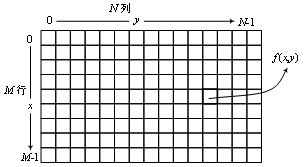

- 注意：OpenCV、Scikit-image、SciPy中的图像坐标系，约定坐标x轴水平向右，对应数组列序；坐标y轴垂直向下，对应数组行序。

- 建立图像坐标系对图像几何变换非常重要。图像几何变换通过改变像素的位置来实现图像几何结构的变形，在图像配准（Image Register）、计算机图形学（Computer Graphics）、电脑动漫（Computer Animation）、计算机视觉（Computer Vision）、视觉特效（Visual Effects）等领域有着广泛的应用。具体方法将在“第6章 图像几何变换”中详细讲解。

In [ ]:
#图像旋转变换
#导入用到的包及模块
import cv2 as cv
from skimage import transform,util
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#读入一幅彩色图像
img = cv.imread('./imagedata/baboon.jpg',cv.IMREAD_COLOR)
#将色序有BGR调整为RGB
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
#获取图像的高、宽
rows,cols=img.shape[0:2]
#构建旋转矩阵，指定旋转中心，旋转角度，旋转后的缩放因子
#绕图像中心将图像逆时针旋转45度，不改变输出图像大小
matrotate = cv.getRotationMatrix2D(center=(cols/2,rows/2), angle=45, scale=1)
#采用仿射变换进行图像旋转,边缘处背景设为亮灰色
imgdst1 = cv.warpAffine(img,matrotate,dsize=(cols,rows),borderValue =(200,200,200))

#skimage实现绕图像中心逆时针旋转45度，改变输出图像大小,边界颜色设为中灰色
imgdst2 = transform.rotate(img, 45, resize=True, cval=0.5)
#将图像的数据类型由浮点小数[0,1]转换为uint8型[0,255]
imgdst2 = util.img_as_ubyte(imgdst2)

#显示结果
plt.figure(figsize=(16,6)) #设置窗口大小(宽,高)

plt.subplot(1,3,1);  plt.imshow(img)
plt.title('Original image') 
plt.axis('off')

plt.subplot(1,3,2);  plt.imshow(imgdst1)
plt.title('Rotated 45 degree by OpenCV') 
plt.axis('off')

plt.subplot(1,3,3);  plt.imshow(imgdst2)
plt.title('Rotated 45 degree and resize by Skimage') 
plt.axis('off')

plt.show()
#-----------------------

In [ ]:
#保存图像
#from skimage import io
#io.imsave('opencv_baboon_45.png', imgdst1)

## 1.5 图像的基本运算
### 1.5.1 图像的算术运算

- 需要注意的是，图像数据采用NumPy的uint8类型，当计算结果超出范围[0,255]时会溢出
- 要实现uint8类型图像数据算术运算的饱和处理，可先将uint8类型图像数据转换为浮点数，再将计算结果用函数np.clip()进行饱和处理，最后用成员函数astype(np.uint8)或np.uint8()将数据类型转换为uint8型

In [ ]:
#观察NumPy的uint8类型数据的算术运算的溢出现象
#导入用到的NumPy包
import numpy as np
#创建一个uint8类型数组
x=np.array([252,236,211],dtype = np.uint8)
x

In [ ]:
y = x+20          #数组x加常数20
print(y,y.dtype)  #显示计算结果
z = x-255         #数组x减常数255
print(z,z.dtype)  #显示计算结果

In [ ]:
#NumPy中uint8类型图像数据算术运算的饱和处理
#导入用到的NumPy包
import numpy as np

#创建一个uint8类型数组
x=np.array([252,236,211],dtype = np.uint8)
#数组x加常数20
y = x.astype(float)+20
y = np.clip(y,0,255).astype(np.uint8)
#显示计算结果
print(y,y.dtype)
#数组x减常数238
z = x.astype(float)-255
z = np.clip(z,0,255).astype(np.uint8)
#显示计算结果
print(z,z.dtype)
z = np.clip(z,0,255).astype('uint8')

### 以下示例通过图像数组与常数的加、乘等简单运算，来增强图像的亮度与对比度
- 图像的算术运算示例-采用Numpy

In [ ]:
#图像的算术运算示例-采用Numpy
#导入用到的包及模块
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#读入一幅彩色图像
img = io.imread('./imagedata/old_villa.jpg')
#增加图像的亮度,每个像素的3个颜色分量RGB值均加50
img1 = img.astype(float)+50
img1= np.clip(img1,0,255).astype(np.uint8)

#颜色分量也可以不同，如[0,50,50],图像变亮且呈现黄色调
img2 = img.astype(float)+[50,50,0]
img2= np.clip(img2,0,255).astype(np.uint8)

#增加图像的对比度，每个像素值乘1.5
img3 = img.astype(float)*1.5
img3= np.clip(img3,0,255).astype(np.uint8)

#显示结果
plt.figure(figsize=(18,12)) #设置窗口大小(宽,高)
plt.subplot(1,4,1); plt.imshow(img)
plt.title('Original') 
plt.axis('off')
plt.subplot(1,4,2); plt.imshow(img1)
plt.title('Brightness enhanced') 
plt.axis('off')
plt.subplot(1,4,3); plt.imshow(img2)
plt.title('Brightness enhanced with yellow tint') 
plt.axis('off')
plt.subplot(1,4,4); plt.imshow(img3)
plt.title('Contrast enhanced') 
plt.axis('off')

plt.show()
#-----------------------------------------

In [ ]:
#OpenCV: 图像的算术运算示例
#导入用到的包及模块
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#读入一幅彩色图像
img = cv.imread('./imagedata/old_villa.jpg',cv.IMREAD_COLOR)
#增加图像的亮度,每个像素的3个颜色分量BGR值均加50
M = np.ones(img.shape, dtype = "uint8") * 50
img1 = cv.add(img, M)

#颜色分量也可以不同，如[0,50,50],图像变亮且呈现黄色调
M[:,:,0] = 0
img2 = cv.add(img, M)

#增加图像的对比度，每个像素值乘1.5
# dst = src1*alpha + src2*beta + gamma;
img3 = cv.addWeighted(src1=img,alpha=1.5,src2=0,beta=0,gamma=0)

#显示结果
plt.figure(figsize=(18,12)) #设置窗口大小(宽,高)
plt.subplot(1,4,1); plt.imshow(img[:,:,::-1])
plt.title('Original') 
plt.axis('off')
plt.subplot(1,4,2); plt.imshow(img1[:,:,::-1])
plt.title('Brightness enhanced') 
plt.axis('off')
plt.subplot(1,4,3); plt.imshow(img2[:,:,::-1])
plt.title('Brightness enhanced with yellow tint') 
plt.axis('off')
plt.subplot(1,4,4); plt.imshow(img3[:,:,::-1])
plt.title('Contrast enhanced') 
plt.axis('off')

plt.show()
#-------------------------

### 1.5.2 图像的比较运算

In [ ]:
#图像的比较运算示例
#导入用到的包及模块
import numpy as np
#创建两个二维数组
f= np.array([[125, 36],[79,66]])
g = np.array([[100, 36],[88,0]])
#比较两个数组大小
x = f>g
#显示结果
print('x=',x)
#比较数组与常数的大小
y = f>80
#显示结果
print('y=',y)

### 1.5.3 图像的逻辑运算

In [ ]:
a = np.logical_and(f,g)  #两个数组的逻辑与
b = np.logical_or(f,g)   #两个数组的逻辑或
#显示结果
print('a=',a)
print('b=',b)

### 1.5.4 图像的二进制位运算

In [ ]:
#图像的二进制位“与”
np.bitwise_and(13, 17)

In [ ]:
#图像的二进制位“或”
np.bitwise_or(13, 17)

### 1.5.5 图像运算示例
#### 1.运动目标检测（运动分割）

In [ ]:
#采用参考帧背景减除法实现视频图像运动目标检测
#导入用到的包
import numpy as np
import cv2 as cv

#创建VideoCapture对象读取视频文件
cap = cv.VideoCapture('./imagedata/atrium.mp4') 
#调用VideoCapture对象的成员函数isOpened()，查看文件打开状态
#返回True正常继续，False失败，程序退出
if not cap.isOpened():
    print("Cannot open the file! ")
    exit()
    
#调用VideoCapture对象的成员函数get，获取视频的帧率、帧宽和高
fps = cap.get(cv.CAP_PROP_FPS)
frame_width = cap.get(cv.CAP_PROP_FRAME_WIDTH)
frame_height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)

#读取视频图像首帧作为参考背景
ret, imgbg = cap.read()

#定义一个阈值
Threh = 20.0

#读取视频图像帧直至按Esc键退出或最后一帧
while cap.isOpened():
    #调用VideoCapture对象的成员函数read()采集视频图像帧
    ret, frame = cap.read()
    #如果正确读取视频图像帧，返回值ret为True，否则为False则退出程序
    if not ret:
        print("Can't receive frame, or end of file playback, Exiting ...")
        break
    
    #以下代码处理视频图像帧
    #当前帧与参考背景图像相减并取绝对值    
    imgdiff = cv.absdiff(imgbg,frame)      
    #与阈值Threh做“大于”比较运算,得到bool值三维数据  
    imgfg3 = cv.compare(imgdiff, Threh, cmpop=cv.CMP_GT)
    
    '''
    #或采用NumPy数组运算
    #当前帧与参考背景图像相减
    imgdiff = imgbg.astype(np.float) - frame.astype(float)  
    #对差值取绝对值，然后与阈值Threh做“大于”比较运算,得到bool值三维数据
    imgfg3 = np.abs(imgdiff )> Threh
    '''
    
    #如果图像像素有一个颜色分量的变化超过了阈值，就认为该像素为运动目标
    #注意，此处采用了图像的逻辑any“或”运算
    imgfg = np.any(imgfg3,axis=2)
    #将bool类型数组转换为uint8
    imgfg = 255*imgfg.astype(np.uint8)
    
    #显示图像
    cv.imshow('color frame', frame)
    cv.imshow('Segmented result', imgfg)
    #根据读取的视频文件帧率播放图像，按Esc键退出
    if  cv.waitKey(int(1000/fps)) & 0xFF == 27: 
        break

#退出视频播放，释放VideoCapture对象
cap.release()
#关闭图像显示窗口并释放资源
cv.destroyAllWindows()
#---------------------------

#### 2.图像叠加 --  图像的二进制位运算

In [ ]:
#图像叠加-图像的二进制位运算
#导入用到的包
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

#读入一幅彩色图像
img1 = cv.imread('./imagedata/pumpkin.jpg')
#将色序由BGR调整为RGB
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
#读入具有alpha通道的opencv_logo图像
imglogo = cv.imread('./imagedata/opencv-logo-white.png',cv.IMREAD_UNCHANGED)
#将色序由BGRA调整为RGBA
imglogo = cv.cvtColor(imglogo,cv.COLOR_BGRA2RGBA)

#获取opencv_logo图像
img2 = imglogo[:,:,0:3]
#获取opencv_logo图像的alpha通道,作为掩膜
img_alpha = imglogo[:,:,3]

#获取Opencv_logo图像的维数
rows,cols,channels = img2.shape
#复制所选择待叠加区域对应的图块
roi = img1[10:10+rows, 10:10+cols]

#位非运算
mask_inv = cv.bitwise_not(img_alpha)
#把待叠加区域图块roi中logo位置涂黑
# Now black-out the area of logo in ROI
roi_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
#把Opencv_logo图像中背景区域涂黑
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = img_alpha)

# Put logo in ROI and modify the main image
#将Opencv_logo叠加到图块roi中
dst = cv.add(roi_bg,img2_fg)
#把结果覆盖原图像指定位置
img1[10:10+rows, 10:10+cols ] = dst

#显示结果
plt.figure(figsize=(12,6)) #设置窗口大小(宽,高)
plt.subplot(2,3,1), plt.imshow(imglogo)
plt.title('Opencv_logo') 
plt.axis('off')
plt.subplot(2,3,2), plt.imshow(img_alpha, cmap = 'gray', vmin=0,vmax=255)
plt.title('alpha channel of the opencv-logo-white.png') 
plt.axis('off')
plt.subplot(2,3,3), plt.imshow(img2_fg)
plt.title('foreground of the logo ') 
plt.axis('off')
plt.subplot(2,3,4), plt.imshow(roi_bg)
plt.title('background of the selected roi') 
plt.axis('off')
plt.subplot(2,3,5), plt.imshow(dst)
plt.title('put logo above roi') 
plt.axis('off')
plt.subplot(2,3,6), plt.imshow(img1)
plt.title('put the OpenCV logo above the image') 
plt.axis('off')

plt.tight_layout()
plt.show()
#--------------------

# The end